# Problem Statement: Analysing Weather Data from OpenWeatherMap API
 ● Interact with the OpenWeatherMap API using the API key to retrieve weather
 data for a specific location.
 ● Extract relevant weather attributes such as temperature, humidity, wind speed,
 and precipitation from the API response.
 ● Clean and preprocess the retrieved data, handling missing values or
 inconsistent formats.
 ● Perform data modelling to analyse weather patterns, such as calculating
 average temperature, maximum/minimum values, or trends over time.
 ● Visualise the weather data using appropriate plots, such as line charts, bar plots,
 or scatter plots, to represent temperature changes, precipitation levels, or wind
 speed variations.
 ● Applydata aggregation techniques to summarise weather statistics by specific
 time periods (e.g., daily, monthly, seasonal).
 ● Explore and visualise relationships between weather attributes, such as
 temperature and humidity, using correlation plots or heatmaps.

In [18]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=b88d883f9216be20f52163066d5e7a9a' 
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730376000,
            "main": {
                "temp": 288.98,
                "feels_like": 288.73,
                "temp_min": 288.98,
                "temp_max": 289.46,
                "pressure": 1026,
                "sea_level": 1026,
                "grnd_level": 940,
                "humidity": 81,
                "temp_kf": -0.48
            },
            "weather": [
                {
                    "id": 801,
                    "main": "Clouds",
                    "description": "few clouds",
                    "icon": "02d"
                }
            ],
            "clouds": {
                "all": 18
            },
            "wind": {
                "speed": 1.46,
                "deg": 40,
                "gust": 1.43
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
          

In [25]:
date_time = data['list'][0]['dt_txt']
date_time

'2024-10-31 12:00:00'

In [27]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']

    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head(10)


,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,288.98,81,1.46,few clouds,2024-10-31 12:00:00,2024-10-31,12:00:00
1,288.63,79,1.06,few clouds,2024-10-31 15:00:00,2024-10-31,15:00:00
2,285.59,85,1.18,clear sky,2024-10-31 18:00:00,2024-10-31,18:00:00
3,283.14,82,1.49,clear sky,2024-10-31 21:00:00,2024-10-31,21:00:00
4,282.55,76,1.85,clear sky,2024-11-01 00:00:00,2024-11-01,00:00:00
5,281.99,70,1.62,clear sky,2024-11-01 03:00:00,2024-11-01,03:00:00
6,281.57,65,1.67,few clouds,2024-11-01 06:00:00,2024-11-01,06:00:00
7,287.15,56,0.09,few clouds,2024-11-01 09:00:00,2024-11-01,09:00:00
8,289.82,51,0.59,scattered clouds,2024-11-01 12:00:00,2024-11-01,12:00:00
9,287.56,72,0.50,broken clouds,2024-11-01 15:00:00,2024-11-01,15:00:00


In [30]:
data_df.shape

(40, 7)

In [31]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


In [33]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.000000,40.000000
mean,283.167000,76.650000,1.236500
std,3.143165,12.805347,0.580617
min,278.080000,51.000000,0.090000
25%,280.652500,69.500000,0.862500
50%,282.545000,80.000000,1.170000
75%,285.667500,88.250000,1.622500
max,289.820000,93.000000,2.260000


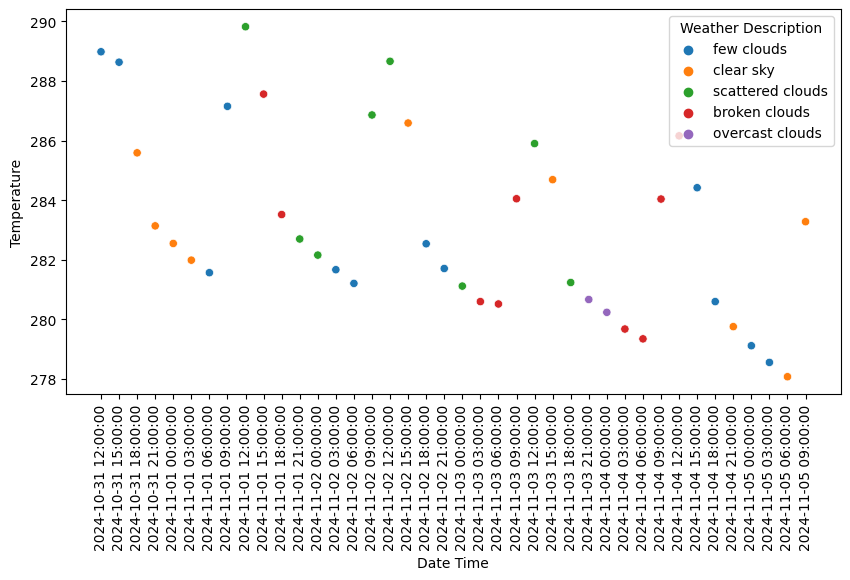

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

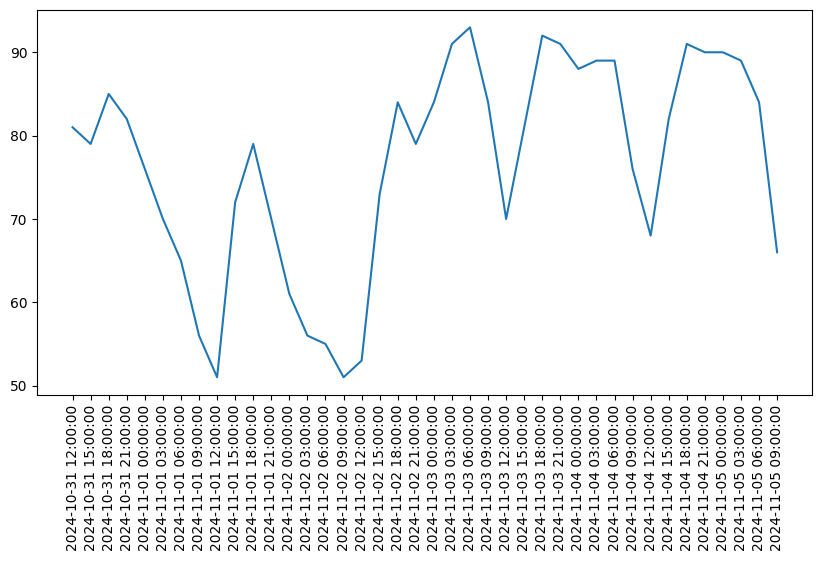

In [35]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Humidity'])
plt.xticks(rotation=90);

In [36]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-10-31,286.58500,1.29750
2024-11-01,284.60750,1.34875
2024-11-02,283.92500,1.41125
2024-11-03,282.34875,1.08375
2024-11-04,281.78125,1.14750
2024-11-05,279.76000,1.08500


<Axes: >

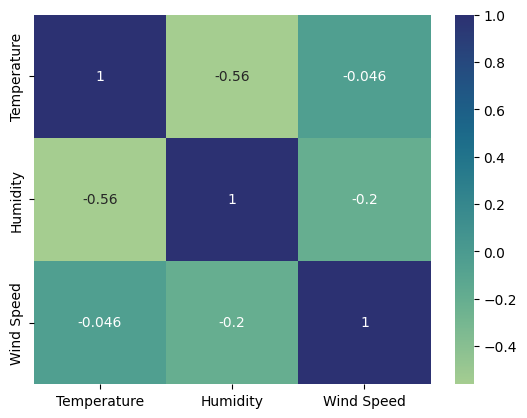

In [37]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='crest')